In [1]:
import numpy as np
import scipy as sp
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import nltk

import os

In [103]:
data_path="./data.csv"
data=pd.read_csv(data_path)

In [104]:
data.head(20)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
8,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
9,9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M


In [105]:
sort=data.sort_values(by=['ShortPassing'],ascending=False)
sort[:20]

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
13,13,168542,David Silva,32,https://cdn.sofifa.org/players/4/19/168542.png,Spain,https://cdn.sofifa.org/flags/45.png,90,90,Manchester City,...,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,€111M
6,6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
11,11,182521,T. Kroos,28,https://cdn.sofifa.org/players/4/19/182521.png,Germany,https://cdn.sofifa.org/flags/21.png,90,90,Real Madrid,...,85.0,72.0,79.0,69.0,10.0,11.0,13.0,7.0,10.0,€156.8M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
31,31,190460,C. Eriksen,26,https://cdn.sofifa.org/players/4/19/190460.png,Denmark,https://cdn.sofifa.org/flags/13.png,88,91,Tottenham Hotspur,...,88.0,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,€141.5M
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
67,67,189509,Thiago,27,https://cdn.sofifa.org/players/4/19/189509.png,Spain,https://cdn.sofifa.org/flags/45.png,86,86,FC Bayern München,...,85.0,67.0,63.0,65.0,6.0,11.0,7.0,9.0,13.0,€75.1M
63,63,199556,M. Verratti,25,https://cdn.sofifa.org/players/4/19/199556.png,Italy,https://cdn.sofifa.org/flags/27.png,86,89,Paris Saint-Germain,...,93.0,78.0,83.0,80.0,12.0,12.0,15.0,15.0,10.0,€105.9M
76,76,41,Iniesta,34,https://cdn.sofifa.org/players/4/19/41.png,Spain,https://cdn.sofifa.org/flags/45.png,86,86,Vissel Kobe,...,89.0,67.0,57.0,56.0,6.0,13.0,6.0,13.0,7.0,€26.9M
86,86,193747,Koke,26,https://cdn.sofifa.org/players/4/19/193747.png,Spain,https://cdn.sofifa.org/flags/45.png,85,86,Atlético Madrid,...,78.0,80.0,69.0,51.0,14.0,12.0,5.0,10.0,13.0,€95.6M


In [130]:
fifa_data=pd.DataFrame(data,columns=['ID','Name','Overall','Wage','Preferred Foot','Nationality','Jersey Number'])
fifa_data['Wage']=fifa_data['Wage'].str.extract('(\d+)').astype(int)

fifa_data

,ID,Name,Overall,Wage,Preferred Foot,Nationality,Jersey Number
0,158023,L. Messi,94,565,Left,Argentina,10.0
1,20801,Cristiano Ronaldo,94,405,Right,Portugal,7.0
2,190871,Neymar Jr,92,290,Right,Brazil,10.0
3,193080,De Gea,91,260,Right,Spain,1.0
4,192985,K. De Bruyne,91,355,Right,Belgium,7.0
5,183277,E. Hazard,91,340,Right,Belgium,10.0
6,177003,L. Modrić,91,420,Right,Croatia,10.0
7,176580,L. Suárez,91,455,Right,Uruguay,9.0
8,155862,Sergio Ramos,91,380,Right,Spain,15.0
9,200389,J. Oblak,90,94,Right,Slovenia,1.0


1.慣用腳統計

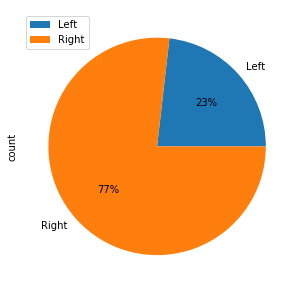

In [26]:
prefer_foot=pd.DataFrame(fifa_data,columns=['Preferred Foot'])
prefer_foot['count']=pd.Series(np.ones(len(fifa_data)),index=fifa_data.index)
prefer_foot=prefer_foot.groupby(['Preferred Foot']).agg({'count':'sum'}).reset_index()
prefer_foot.index=['Left','Right']
pie_chart=prefer_foot.plot.pie(y='count',figsize=(5,5),autopct='%1.0f%%')


2.能力值與wage(工資)的關係

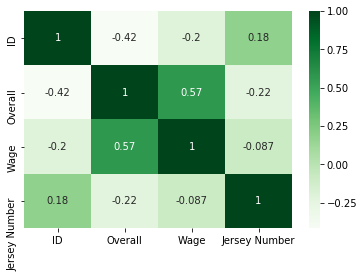

In [55]:
heatmap_input=sns.heatmap(fifa_data[['ID','Name','Overall','Wage','Preferred Foot','Nationality','Jersey Number']].corr(),annot=True,cmap='Greens')
heatmap_input
#sns.heatmap(heatmap_input,xticklabels=heatmap_input['Overall'],yticklabels=heatmap_input['Wage'])

3.球員最喜愛的球衣號碼

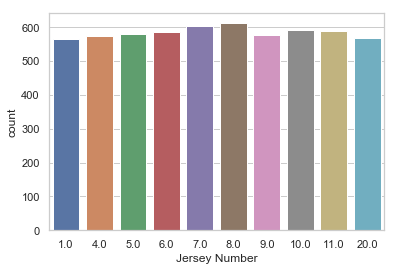

In [137]:
favorite_jersey=pd.DataFrame(fifa_data,columns=['Jersey Number'])
favorite_jersey['count']=pd.Series(np.ones(len(fifa_data)),index=fifa_data.index)
favorite_jersey=favorite_jersey.groupby(['Jersey Number']).agg({'count':'sum'}).reset_index()
sort=favorite_jersey.sort_values(by=['count'],ascending=False).reset_index()
sort=sort[:10]

sns.set(style='whitegrid')
tips=sort
ax=sns.barplot(x='Jersey Number',y='count',data=sort)

4.國籍統計 人數前二十名的國家

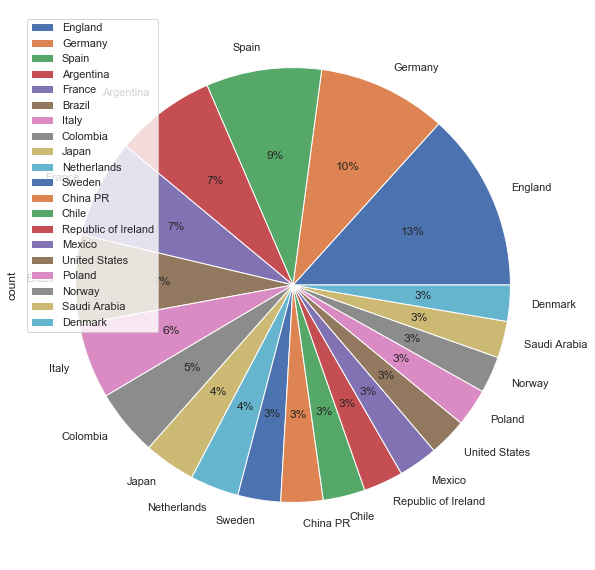

In [150]:
nationality=pd.DataFrame(fifa_data,columns=['Nationality'])
nationality['count']=pd.Series(np.ones(len(fifa_data)),index=fifa_data.index)
nationality=nationality.groupby(['Nationality']).agg({'count':'sum'})
nationality=nationality.sort_values(by=['count'],ascending=False)
nationality=nationality[:20]
pie_chart=nationality.plot.pie(x='Nationality',y='count',figsize=(10,10),autopct='%1.0f%%')